## Downloading required libraries

In [1]:
# pip install imbalanced-learn used to install imbalanced learn

# Make sure the version of anaconda is the latest 

In [2]:
import sklearn
print(sklearn.__version__)

0.24.1


### Importing the relevent libraries

In [3]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
                                                                            # confusion matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from sklearn.neighbors import KNeighborsClassifier  # performs K Neariesst Neighobour.
from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # Performs svm
from sklearn.naive_bayes import GaussianNB  # performs naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  #Perfroms decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  #Performs random forest classification.
from xgboost import XGBClassifier  # performs xgboost classification. gradiant decision trees.
from sklearn.linear_model import LinearRegression  # will use to replace missing values linear regressoin
from sklearn.decomposition import PCA  # Performs model optimization
from sklearn.decomposition import KernelPCA  # Performs model optimization
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA # performs model optimization
from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from imblearn.under_sampling import RandomUnderSampler # Uses Under sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv


from collections import Counter  # Allows the counting the items in an iterable list.

import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.

# Function to check principal Components

In [4]:
def pcafuntion(X,pcomponents ,pcolumns, y_value, y_var, plot_labels):  # A function to perfrom PCA with paramenters given.
    # Normalizing data before applying pca
    sc = StandardScaler()  # creating an instance of the object.
    X = sc.fit_transform(X)   # selecting vaues to perfom transformation on  

    pca = PCA(n_components=pcomponents)  # selecting number of principal components
    principalComponents = pca.fit_transform(X)  #  # selecting values to perfom transformation on  
    principalDf = pd.DataFrame(data = principalComponents  # creating a new dataframe with principal components.
                 , columns =pcolumns)
    finalDf = pd.concat([principalDf, y_value], axis = 1)  # concnating principal componenets with Class.
    print(finalDf)  # looking at the out put from pca.
    print("\n",pca.explained_variance_ratio_)# shows how much information is reatined from the pca

    missing = 0  # setting variable to 0.
    for i in range(len(pca.explained_variance_ratio_)):  # for looping in length of the array pca.explained_variance_ratio_
        missing = missing  + pca.explained_variance_ratio_[i]  # adding pca.explained_variance_ratio_[i] 
                                                              # varables values to missing variable
    print("Total values :  ", missing, "%")  # total data left 
    missing = 1 - missing  # subtracting missing variables value from 1.
    print("missing values :", missing, "%")  # total data lost
    
    
    
    if pcomponents == 2:  # checks the number of principal components.
        plot = sns.relplot(
            x='principal component 1', 
            y='principal component 2', 
            hue=y_var, 
            data=finalDf,
            facet_kws={'legend_out': False}
        )  # plots a scatter plot of principal components.

        plt.title('Dataset with pca')  # Title of the plot
        # check axes and find which is have legend
        leg = plot.axes.flat[0].get_legend()
        new_title =y_var  # Legend title.
        leg.set_title(new_title)  # setting title to legend.
        leg.get_frame().set_alpha(255) # setting transparency level for legend box
        labels = plot_labels  # label list for legend
        for t, l in zip(plot._legend.texts, labels):  # looping through a touple.
            t.set_text(l)  # adding label to list
    
    elif pcomponents == 3:  # checks the number of principal components.
        
        fig = plt.figure(figsize=(15,10))  # setting plot size
        ax = plt.axes(projection='3d')  # specifying that it is a 3d plot.
        plt.title('Dataset with pca', fontsize=20)  # adding a title to the plot
        # Data for three-dimensional scattered points
        xdata = finalDf['principal component 1']  # selecting first princal component.
        ydata = finalDf['principal component 2']  # selecting second princal component.
        zdata = finalDf['principal component 3']  # selecting third princal component.
        ax.scatter3D(xdata, ydata, zdata, c=y_value)  # plotting princhpla components

        ax.set_xlabel("First Principal Component",fontsize=15)  # setting label for first principal componenet.
        ax.set_ylabel("Second Principal Component",fontsize=15)  # setting label for second principal componenet.
        ax.set_zlabel("Third Principal Component",fontsize=15)  # setting label for third principal componenet.

        plt.show()  # making plot visible.
        
    return finalDf  # returning finalDf


#  Function to replace missing values Using KNN

In [5]:
def missng_values_filler_knn(missingdataframevalue,colname):  # function replaces missing values using KNN's. function 
                                                              # name specified and paramaters given
    columntobereplaced = missingdataframevalue.to_numpy()   # The column to be replaced is stored in a variable.

    imputer = KNNImputer(n_neighbors=10, weights="uniform")  # creating instance of the object.
    replaced = imputer.fit_transform(columntobereplaced).astype(np.int64)  # fitting the model and replaing missing values
                                                                        # converting float to int.
    print(len(replaced))  # printing replaced lenght
    dataframe=pd.DataFrame(replaced, columns=colname)  # adding replaced values in a dataframe column and giving the column a 
                                                      # name.
    print("null values ", dataframe.isnull().sum()) # Checking the dataframe for null values.
    print(dataframe.head(5))  # printing head of new data frame
    return dataframe  # returning the dataframe

# Function to perform OneHotEncoding

In [6]:
def encodingoh(required_column,dropped_column,column_rename):  # function to perform the one hot encoding with parameters given.
    oh = OneHotEncoder(drop=dropped_column,dtype=np.int)  # creates the instace of the object.
    newdf = required_column  # creates a new data frame from the column to be one hot encoded
    newdf = oh.fit_transform(newdf).toarray()  # one hot enocdes the new dataframe as a array
    newdf = pd.DataFrame(newdf)  # converts the newly created array to a dataframe.
    newdf.columns = column_rename  # renames the newly encoded column
    print(newdf.head(5))  # outputs the head of the dataframe.
    return newdf  # returns the one hot encoded data frame

### Importing the dataframe

In [7]:
sucidedataframe = pd.read_csv("suicidedataextrafestures.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [8]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,yearlyHDI,GDPpyear,...,"Unemployment, total (% of total labor force) (modeled ILO estimate)","Physicians (per 1,000 people)",Strength of legal rights index (0=weak to 12=strong),"Labor force, total","Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Refugee population by country or territory of origin,"Contributing family workers, total (% of total employment) (modeled ILO estimate)",Access to electricity (% of population),"Lower secondary completion rate, total (% of relevant age group)"
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,0.694,8.841667e+10,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


### checking null values

<AxesSubplot:>

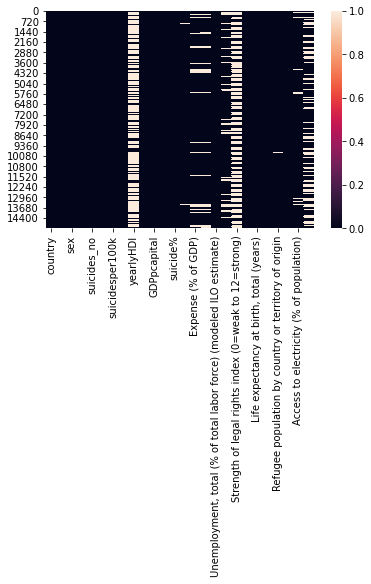

In [9]:
sns.heatmap(sucidedataframe.isnull())

In [10]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   country                                                                            15110 non-null  object 
 1   year                                                                               15110 non-null  int64  
 2   sex                                                                                15110 non-null  object 
 3   age                                                                                15110 non-null  object 
 4   suicides_no                                                                        15110 non-null  int64  
 5   population                                                                         15110 non-null  int

## 1. Data pre-processing

In [11]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["country", "age" ,"sex", "population",  \
"Individuals using the Internet (% of population)", "Labor force, total", \
"Mobile cellular subscriptions (per 100 people)", "GDPpyear","GDPpcapital","Expense (% of GDP)",\
"Physicians (per 1,000 people)","Refugee population by country or territory of origin" ,"suicidesper100k"]]## 1. Data 
                                                                                                          # pre-processing

In [12]:
sucidedataframe.head(5)  # out puts data from dataframe

,country,age,sex,population,Individuals using the Internet (% of population),"Labor force, total",Mobile cellular subscriptions (per 100 people),GDPpyear,GDPpcapital,Expense (% of GDP),"Physicians (per 1,000 people)",Refugee population by country or territory of origin,suicidesper100k
0,Argentina,75+ years,male,363000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,55.65
1,Argentina,55-74 years,male,1997000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,24.29
2,Argentina,35-54 years,male,3346300,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,12.37
3,Argentina,55-74 years,female,2304000,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,9.11
4,Argentina,25-34 years,male,2234200,0.0,0,0.0,8.841667e+10,3264,0.0,0.0,0.0,7.92


In [13]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Country", "Age", "Gender", "Population", \
"Internet_Usage_per_percent_Population", "Total_Labour_force", "Cellular_subscriptions_per_100_people", \
"GDPpyear","GDPpcapital","Expense_percent_of_GDP)",\
"Physicians_per_1,000_people)","Refugee_population_by_country_or_territory_of_origin" ,"Suicidesper100k"],axis=1)

### initial plot to visulize the data before working on it.

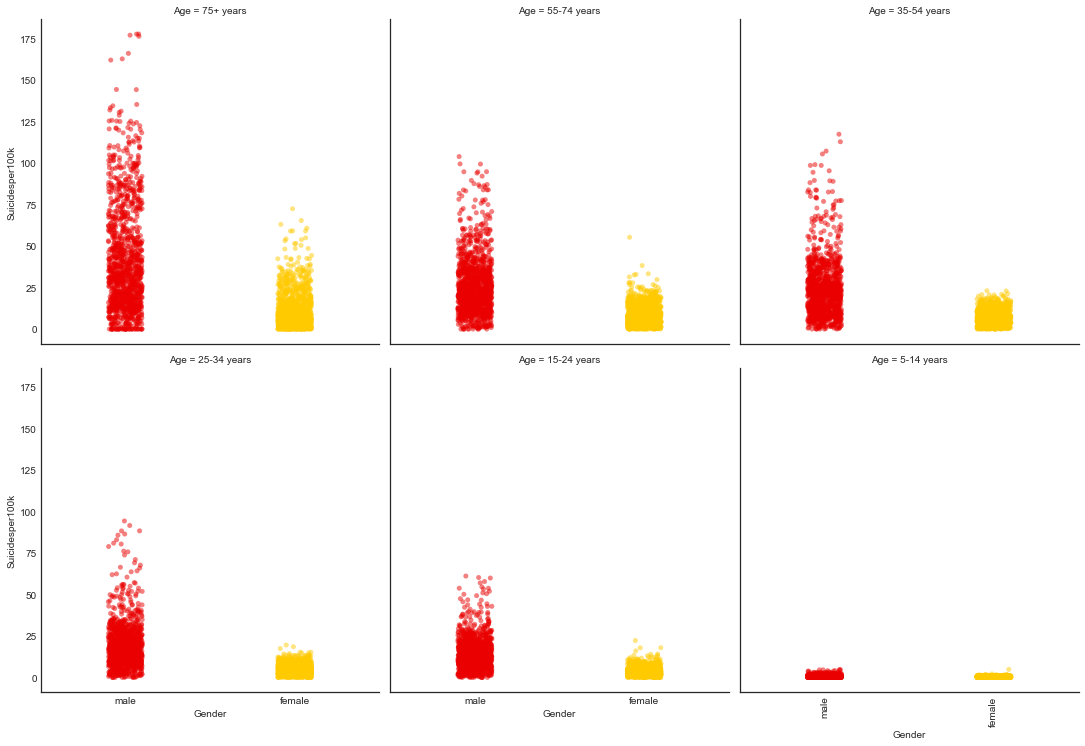

In [14]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.style.use('seaborn-white')
sns.catplot(x='Gender', y="Suicidesper100k", col="Age", col_wrap=3, sharey=True, data=sucidedataframe, alpha=0.5, palette = 'hot')
plt.xticks(rotation = 90)
plt.show()

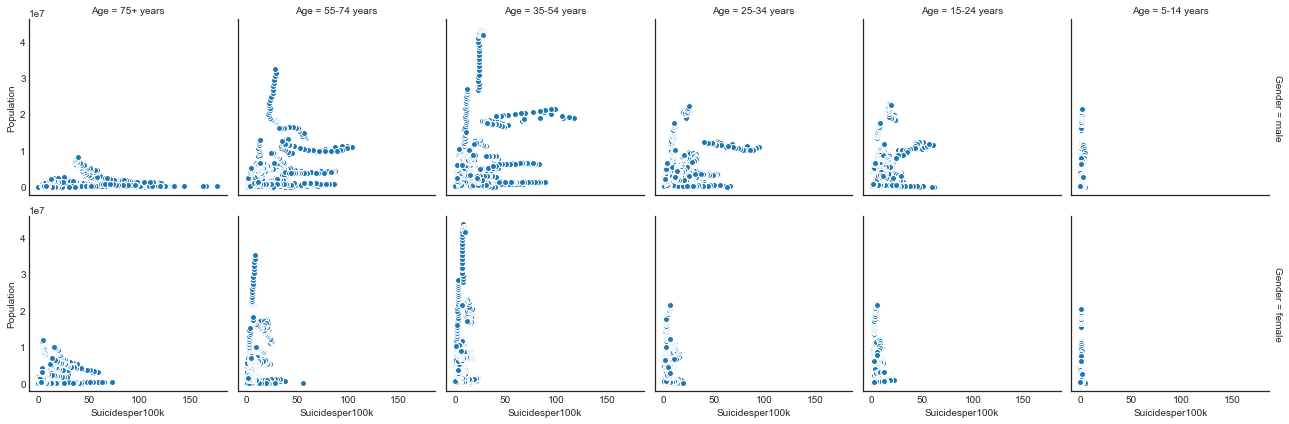

In [15]:
My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
My_plot_object.map(plt.scatter,"Suicidesper100k",'Population',edgecolor = 'w')
plt.show()

In [16]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

Index(['Country', 'Age', 'Gender', 'Population',
       'Internet_Usage_per_percent_Population', 'Total_Labour_force',
       'Cellular_subscriptions_per_100_people', 'GDPpyear', 'GDPpcapital',
       'Expense_percent_of_GDP)', 'Physicians_per_1,000_people)',
       'Refugee_population_by_country_or_territory_of_origin',
       'Suicidesper100k'],
      dtype='object')

In [17]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(15110, 13)

### Dealing with null values

<AxesSubplot:>

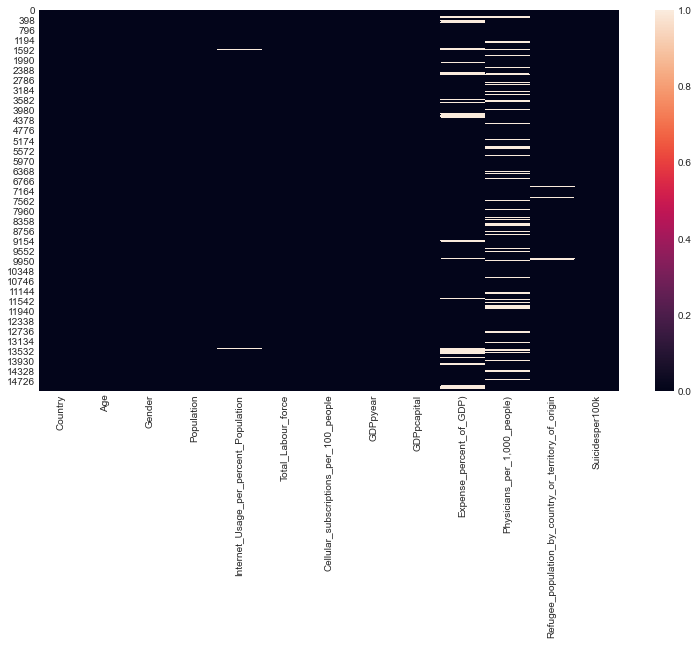

In [18]:
sns.heatmap(sucidedataframe.isnull())  # shows null values

In [19]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                                    0
Age                                                        0
Gender                                                     0
Population                                                 0
Internet_Usage_per_percent_Population                    108
Total_Labour_force                                         0
Cellular_subscriptions_per_100_people                      0
GDPpyear                                                   0
GDPpcapital                                                0
Expense_percent_of_GDP)                                 1476
Physicians_per_1,000_people)                            2328
Refugee_population_by_country_or_territory_of_origin     132
Suicidesper100k                                            0
dtype: int64

In [20]:
sucidedataframe.info()  # checking basic information on dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               15110 non-null  object 
 1   Age                                                   15110 non-null  object 
 2   Gender                                                15110 non-null  object 
 3   Population                                            15110 non-null  int64  
 4   Internet_Usage_per_percent_Population                 15002 non-null  float64
 5   Total_Labour_force                                    15110 non-null  int64  
 6   Cellular_subscriptions_per_100_people                 15110 non-null  float64
 7   GDPpyear                                              15110 non-null  float64
 8   GDPpcapital                                           15

In [21]:
#df['Internet_Usage_per_percent_Population'] = df['DataFrame Column'].fillna(mean(column))

In [22]:
print(len(sucidedataframe.Internet_Usage_per_percent_Population))  # printing lenghth of the column.

15110


In [23]:
print(len(sucidedataframe.Refugee_population_by_country_or_territory_of_origin))  # printing lenghth of the column.

15110


In [24]:
print(len(sucidedataframe["Expense_percent_of_GDP)"]))  # printing lenghth of the column.

15110


In [25]:
print(len(sucidedataframe["Physicians_per_1,000_people)"]))  # printing lenghth of the column.

15110


In [26]:
sucidedataframe[["Internet_Usage_per_percent_Population"]] = missng_values_filler_knn(sucidedataframe[["Internet_Usage_per_percent_Population"]], ["Internet_Usage_per_percent_Population"])

15110
null values  Internet_Usage_per_percent_Population    0
dtype: int64
   Internet_Usage_per_percent_Population
0                                      0
1                                      0
2                                      0
3                                      0
4                                      0


In [27]:
# replacing null values using KNN function
sucidedataframe[["Expense_percent_of_GDP)"]] = missng_values_filler_knn(sucidedataframe[["Expense_percent_of_GDP)"]], ["Expense_percent_of_GDP)"])

15110
null values  Expense_percent_of_GDP)    0
dtype: int64
   Expense_percent_of_GDP)
0                        0
1                        0
2                        0
3                        0
4                        0


In [28]:
# replacing null values using KNN function
sucidedataframe[["Refugee_population_by_country_or_territory_of_origin"]] = missng_values_filler_knn(sucidedataframe[["Refugee_population_by_country_or_territory_of_origin"]],["Refugee_population_by_country_or_territory_of_origin"])

15110
null values  Refugee_population_by_country_or_territory_of_origin    0
dtype: int64
   Refugee_population_by_country_or_territory_of_origin
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   


In [29]:
# replacing null values using KNN function
sucidedataframe[["Physicians_per_1,000_people)"]] = missng_values_filler_knn(sucidedataframe[["Physicians_per_1,000_people)"]],["Physicians_per_1,000_people)"])

15110
null values  Physicians_per_1,000_people)    0
dtype: int64
   Physicians_per_1,000_people)
0                             0
1                             0
2                             0
3                             0
4                             0


In [30]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

Country                                                 0
Age                                                     0
Gender                                                  0
Population                                              0
Internet_Usage_per_percent_Population                   0
Total_Labour_force                                      0
Cellular_subscriptions_per_100_people                   0
GDPpyear                                                0
GDPpcapital                                             0
Expense_percent_of_GDP)                                 0
Physicians_per_1,000_people)                            0
Refugee_population_by_country_or_territory_of_origin    0
Suicidesper100k                                         0
dtype: int64

In [31]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [32]:
# sucidedataframe.reset_index(drop=True, inplace=True)  # reseting index.

In [33]:
# sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

In [34]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

(15110, 13)

In [35]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15110 entries, 0 to 15109
Data columns (total 13 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               15110 non-null  object 
 1   Age                                                   15110 non-null  object 
 2   Gender                                                15110 non-null  object 
 3   Population                                            15110 non-null  int64  
 4   Internet_Usage_per_percent_Population                 15110 non-null  int64  
 5   Total_Labour_force                                    15110 non-null  int64  
 6   Cellular_subscriptions_per_100_people                 15110 non-null  float64
 7   GDPpyear                                              15110 non-null  float64
 8   GDPpcapital                                           15

### One Hot Encoding

In [36]:
sucidedataframe.nunique()  # outputs unique values in each column in a data frame.

Country                                                    48
Age                                                         6
Gender                                                      2
Population                                              14557
Internet_Usage_per_percent_Population                      97
Total_Labour_force                                        833
Cellular_subscriptions_per_100_people                     830
GDPpyear                                                  956
GDPpcapital                                              1243
Expense_percent_of_GDP)                                    47
Physicians_per_1,000_people)                                8
Refugee_population_by_country_or_territory_of_origin      559
Suicidesper100k                                          4137
dtype: int64

In [37]:
sucidedataframe.duplicated().sum()  # gives the sum of duplicate dvalues

0

In [38]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Gender
female    7555
male      7555
dtype: int64


In [39]:
print(sucidedataframe.pivot_table(columns=['Country'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Country
Argentina               372
Armenia                 298
Australia               360
Austria                 382
Azerbaijan              192
Belgium                 372
Brazil                  372
Bulgaria                360
Canada                  348
Chile                   372
Colombia                372
Croatia                 262
Cuba                    288
Czech Republic          322
Denmark                 264
Finland                 348
France                  360
Georgia                 264
Germany                 312
Greece                  372
Hungary                 310
Iceland                 382
Ireland                 360
Israel                  372
Italy                   372
Jamaica                 204
Japan                   372
Mexico                  372
Mongolia                 10
Netherlands             382
New Zealand             348
Norway                  360
Poland                  288
Portugal                324
Romania                 334
Russian Fede

In [40]:
sucidedataframe.head(1)  # outputs the head of the dataframe

,Country,Age,Gender,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,75+ years,male,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65


In [41]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Age
15-24 years    2522
25-34 years    2522
35-54 years    2522
5-14 years     2500
55-74 years    2522
75+ years      2522
dtype: int64


In [42]:
sucidedataframe.index = pd.RangeIndex(len(sucidedataframe.index))  # outputs indext of the data frame

In [43]:
sucidedataframe.head()

,Country,Age,Gender,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,75+ years,male,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,Argentina,55-74 years,male,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,Argentina,35-54 years,male,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,Argentina,55-74 years,female,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,Argentina,25-34 years,male,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92


### One Hot Encoding

In [44]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # prints the unique values of the column.

Gender
female    7555
male      7555
dtype: int64


In [45]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # prints the unique values of the column.

Age
15-24 years    2522
25-34 years    2522
35-54 years    2522
5-14 years     2500
55-74 years    2522
75+ years      2522
dtype: int64


In [46]:
#  one hot enocdes the column using the created function.
age = encodingoh(sucidedataframe[["Age"]], None, ['15-24 years',"25-34 years", "35-54 years", "5-14 years", "55-74 years", "75+ years"])

   15-24 years  25-34 years  35-54 years  5-14 years  55-74 years  75+ years
0            0            0            0           0            0          1
1            0            0            0           0            1          0
2            0            0            1           0            0          0
3            0            0            0           0            1          0
4            0            1            0           0            0          0


In [47]:
#  one hot enocdes the column using the created function.
gender = encodingoh(sucidedataframe[["Gender"]], "first", ["Gender"])

   Gender
0       1
1       1
2       1
3       0
4       1


In [48]:
sucidedataframe = sucidedataframe.drop('Age', 1)  # column is dropped

In [49]:
sucidedataframe = sucidedataframe.drop('Gender', 1)   # column is dropped

In [50]:
sucidedataframe.head(5)  # dataframe head is printed.

,Country,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,Argentina,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,Argentina,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,Argentina,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,Argentina,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,Argentina,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92


In [51]:
sucidedataframe = pd.concat([ gender,sucidedataframe],axis=1)  # column is concatanated to dataframe
sucidedataframe.head()  # fisrt elements of the dataframe are outptted

,Gender,Country,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,1,Argentina,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,1,Argentina,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,1,Argentina,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,0,Argentina,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,1,Argentina,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92


In [52]:
sucidedataframe = pd.concat([age,sucidedataframe],axis=1)  # column is concatanated to dataframe
sucidedataframe  # fisrt elements of the dataframe are outptted

,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,Gender,Country,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,0,0,0,0,0,1,1,Argentina,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,0,0,0,0,1,0,1,Argentina,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,0,0,1,0,0,0,1,Argentina,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,0,0,0,0,1,0,0,Argentina,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,0,1,0,0,0,0,1,Argentina,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15105,0,0,1,0,0,0,0,Uzbekistan,3620833,0,0,0.0,6.306708e+10,2309,0,0,0,2.96
15106,0,0,0,0,0,1,0,Uzbekistan,348465,0,0,0.0,6.306708e+10,2309,0,0,0,2.58
15107,0,0,0,1,0,0,1,Uzbekistan,2762158,0,0,0.0,6.306708e+10,2309,0,0,0,2.17
15108,0,0,0,1,0,0,0,Uzbekistan,2631600,0,0,0.0,6.306708e+10,2309,0,0,0,1.67


In [53]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))   # prints the unique values of the column.

Gender
0    7555
1    7555
dtype: int64


In [54]:
print(sucidedataframe.pivot_table(columns=['15-24 years'], aggfunc='size'))  # counts duplicates in the selected 
                                                                             # dataframe column.

15-24 years
0    12588
1     2522
dtype: int64


In [55]:
print(sucidedataframe.pivot_table(columns=["25-34 years"], aggfunc='size'))  # counts duplicates in the selected 
                                                                             # dataframe column.

25-34 years
0    12588
1     2522
dtype: int64


In [56]:
print(sucidedataframe.pivot_table(columns=["35-54 years"], aggfunc='size'))  # counts duplicates in the 
                                                                        # selected dataframe column.

35-54 years
0    12588
1     2522
dtype: int64


In [57]:
print(sucidedataframe.pivot_table(columns=["5-14 years"], aggfunc='size'))  # counts duplicates in the
                                                                            # selected dataframe column.

5-14 years
0    12610
1     2500
dtype: int64


In [58]:
print(sucidedataframe.pivot_table(columns=["55-74 years"], aggfunc='size'))  # counts duplicates in the 
                                                                            # selected dataframe column.

55-74 years
0    12588
1     2522
dtype: int64


In [59]:
print(sucidedataframe.pivot_table(columns=["75+ years"], aggfunc='size'))  # counts duplicates in the 
                                                                        # selected dataframe column.

75+ years
0    12588
1     2522
dtype: int64


In [60]:
sucidedataframe.head()  # the first elements of the data frame are outputted

,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,Gender,Country,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,0,0,0,0,0,1,1,Argentina,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,0,0,0,0,1,0,1,Argentina,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,0,0,1,0,0,0,1,Argentina,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,0,0,0,0,1,0,0,Argentina,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,0,1,0,0,0,0,1,Argentina,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92


In [61]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. 

,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,Gender,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
count,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,1.511000e+04,15110.0,15110.0,15110.0,15110.0,15110.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3035752.0,23.0,12526091.0,44.0,7.837623e+11,20723.0,19.0,1.0,12558.0,13.0
std,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4908197.0,29.0,24602458.0,50.0,1.904350e+12,19307.0,16.0,1.0,51524.0,18.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4400.0,0.0,0.0,0.0,1.201313e+09,357.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424791.0,0.0,0.0,0.0,5.700843e+10,4431.0,0.0,0.0,0.0,2.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1052860.0,6.0,2937065.0,16.0,2.100000e+11,14729.0,19.0,1.0,37.0,7.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3621750.0,43.0,15687072.0,92.0,5.620000e+11,31630.0,33.0,3.0,994.0,18.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,43805214.0,96.0,158831064.0,172.0,1.810000e+13,109804.0,62.0,7.0,551744.0,178.0


<AxesSubplot:>

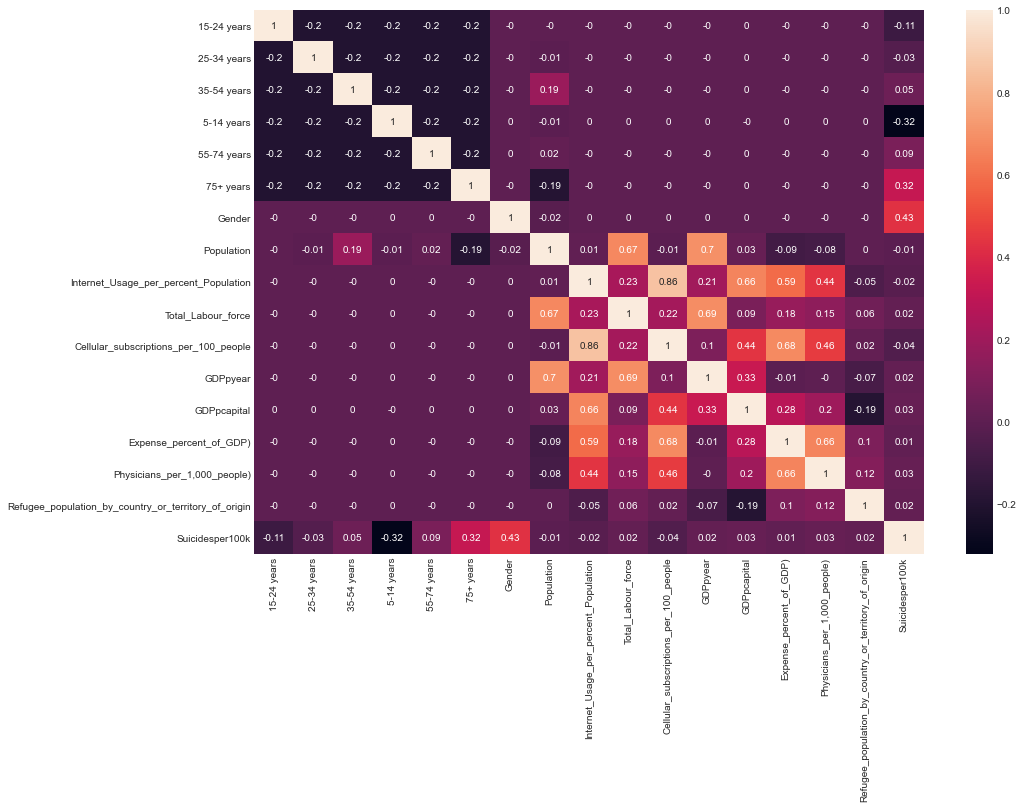

In [62]:
plt.figure(figsize = (15,10))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

In [63]:
Features_after_corelation_matrix = sucidedataframe[[ "Gender", "5-14 years", "15-24 years", "75+ years"]]  # higher correlated 
                                                                                                       # features are selected


In [64]:
Features_after_corelation_matrix.head()  # first elements of the dataframe are outputted.

,Gender,5-14 years,15-24 years,75+ years
0,1,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,0
4,1,0,0,0


In [65]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Country'], aggfunc='size')  # counts duplicates in the selected dataframe column.

Country
Argentina               372
Armenia                 298
Australia               360
Austria                 382
Azerbaijan              192
Belgium                 372
Brazil                  372
Bulgaria                360
Canada                  348
Chile                   372
Colombia                372
Croatia                 262
Cuba                    288
Czech Republic          322
Denmark                 264
Finland                 348
France                  360
Georgia                 264
Germany                 312
Greece                  372
Hungary                 310
Iceland                 382
Ireland                 360
Israel                  372
Italy                   372
Jamaica                 204
Japan                   372
Mexico                  372
Mongolia                 10
Netherlands             382
New Zealand             348
Norway                  360
Poland                  288
Portugal                324
Romania                 334
Russian Fede

In [66]:
each_country = np.unique(sucidedataframe[["Country"]].values) # unique country rows are selected.
each_country  # array is outputted

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia',
       'Croatia', 'Cuba', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Mexico',
       'Mongolia', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Russian Federation', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uzbekistan'], dtype=object)

In [67]:
Country = encodingoh(sucidedataframe[["Country"]], None, each_country)  # each country is one hot encoded at a time.2

   Argentina  Armenia  Australia  Austria  Azerbaijan  Belgium  Brazil  \
0          1        0          0        0           0        0       0   
1          1        0          0        0           0        0       0   
2          1        0          0        0           0        0       0   
3          1        0          0        0           0        0       0   
4          1        0          0        0           0        0       0   

   Bulgaria  Canada  Chile  ...  Sweden  Switzerland  Thailand  Turkey  \
0         0       0      0  ...       0            0         0       0   
1         0       0      0  ...       0            0         0       0   
2         0       0      0  ...       0            0         0       0   
3         0       0      0  ...       0            0         0       0   
4         0       0      0  ...       0            0         0       0   

   Turkmenistan  Ukraine  United Arab Emirates  United Kingdom  United States  \
0             0        0     

In [68]:
sucidedataframe = pd.concat([Country,sucidedataframe],axis=1)  # each new country is concatanated to original data frame.
sucidedataframe.head() # first elements of the data frame are out putted

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,1,0,0,0,0,0,0,0,0,0,...,363000,0,0,0.0,8.841667e+10,3264,0,0,0,55.65
1,1,0,0,0,0,0,0,0,0,0,...,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,24.29
2,1,0,0,0,0,0,0,0,0,0,...,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,12.37
3,1,0,0,0,0,0,0,0,0,0,...,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,9.11
4,1,0,0,0,0,0,0,0,0,0,...,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,7.92


In [69]:
Features_after_corelation_matrix = pd.concat([Country,Features_after_corelation_matrix],axis=1)  # each new country is 
                                                                     # concatanated to highly correlate data frame.
Features_after_corelation_matrix.head()   # first elements of the data frame are out putted

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Gender,5-14 years,15-24 years,75+ years
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [70]:
print(sucidedataframe.columns)  # columns of the data frame are printed

Index(['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Mexico', 'Mongolia', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', '15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years', 'Gender', 'Country', 'Population',
       'Internet_Usage_per_percent_Population', 'Total_Labour_force',
       'Cellular_subscriptions_per_100_people', 'GDPpyear', 'GDPpcapital',
       'Expense_percent_of_GDP)', 'Physicians_per_1,000_people)',
       'R

In [71]:
sucidedataframe = sucidedataframe.drop('Country', 1)  # country column is dropped.

In [72]:
print(sucidedataframe.columns)  # columns of the data frame are printed

Index(['Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Mexico', 'Mongolia', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation', 'South Africa',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', '15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years', 'Gender', 'Population',
       'Internet_Usage_per_percent_Population', 'Total_Labour_force',
       'Cellular_subscriptions_per_100_people', 'GDPpyear', 'GDPpcapital',
       'Expense_percent_of_GDP)', 'Physicians_per_1,000_people)',
       'Refugee_popu

### Making lables

In [73]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. 

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
count,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,15110.0,...,15110.0,15110.0,15110.0,15110.0,1.511000e+04,15110.0,15110.0,15110.0,15110.0,15110.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3035752.0,23.0,12526091.0,44.0,7.837623e+11,20723.0,19.0,1.0,12558.0,13.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4908197.0,29.0,24602458.0,50.0,1.904350e+12,19307.0,16.0,1.0,51524.0,18.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4400.0,0.0,0.0,0.0,1.201313e+09,357.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,424791.0,0.0,0.0,0.0,5.700843e+10,4431.0,0.0,0.0,0.0,2.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1052860.0,6.0,2937065.0,16.0,2.100000e+11,14729.0,19.0,1.0,37.0,7.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3621750.0,43.0,15687072.0,92.0,5.620000e+11,31630.0,33.0,3.0,994.0,18.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,43805214.0,96.0,158831064.0,172.0,1.810000e+13,109804.0,62.0,7.0,551744.0,178.0


# Label encoding

In [74]:
print("max :   ", 178 )
print("high :  ", round(178 / 2))
print("medium :", round(89 / 2))
print("low :   ", round(44 / 2))
print("min :   ", round(22 / 2))


# enogh data catagories to model
# model is not computationally heavy

# when you do neural networks the solution that you reach is a local minimum. you dont know if you reach a global minimium 

# pca 
# igon values tell each values contained in the igon vector(linear combanation of our data).

# 90 % of igon values

# pls

max :    178
high :   89
medium : 44
low :    22
min :    11


In [75]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] < 11), "Suicidesper100k"] = 1 # Encoding values below 11 as 1.

In [76]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 11) & (sucidedataframe["Suicidesper100k"] < 22), "Suicidesper100k"] = 2  
# Encoding values aboveor equal to 11 as and below 22 to 2.

In [77]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 22) & (sucidedataframe["Suicidesper100k"] < 44), "Suicidesper100k"] = 3 
# Encoding values equal to and above 22 and below 44 to 3.

In [78]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 44) & (sucidedataframe["Suicidesper100k"] < 89), "Suicidesper100k"] = 4  
# Encoding values above or equal to 44 as and below 89 to 4.

In [79]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 89) & (sucidedataframe["Suicidesper100k"] <= 178), "Suicidesper100k"] = 5 
# Encoding values above or equal to 89 as and below 178 to 4.

In [80]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

In [81]:
le = LabelEncoder()  # creating the instance of the object.
sucidedataframe.Suicidesper100k = le.fit_transform(sucidedataframe.Suicidesper100k)  # label encoing the require dcolumn.

In [82]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

In [83]:
print(sucidedataframe.pivot_table(columns=['Suicidesper100k'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

Suicidesper100k
0    9264
1    2850
2    2177
3     678
4     141
dtype: int64


In [84]:
9264 + 2850 + 2177 + 678 + 141  # calculation

15110

In [85]:
sucidedataframe.head()  # outputting dataframe head.

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,1,0,0,0,0,0,0,0,0,0,...,363000,0,0,0.0,8.841667e+10,3264,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,...,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,0


In [86]:
one = str(round(100 * (9264/15110),2)) + "%"   # percentage of the value is checked from label column.
two  = str(round(100 * (2850/15110),2)) + "%"  # percentage of the value is checked from label column.
three = str(round(100 * (2177/15110),2)) + "%"  # percentage of the value is checked from label column.
four = str(round(100 * (678/15110),2)) + "%"  # percentage of the value is checked from label column.
five = str(round(100 * (141/15110),2)) + "%"  # percentage of the value is checked from label column.

In [87]:
print("1 is represented ", one, "\n2 is represented ", two, "\n3 is represented ", three, "\n4 is represented ", four, "\n5 is represented ", five)
# percentage of the value is printed of label column.

1 is represented  61.31% 
2 is represented  18.86% 
3 is represented  14.41% 
4 is represented  4.49% 
5 is represented  0.93%


<BarContainer object of 5 artists>

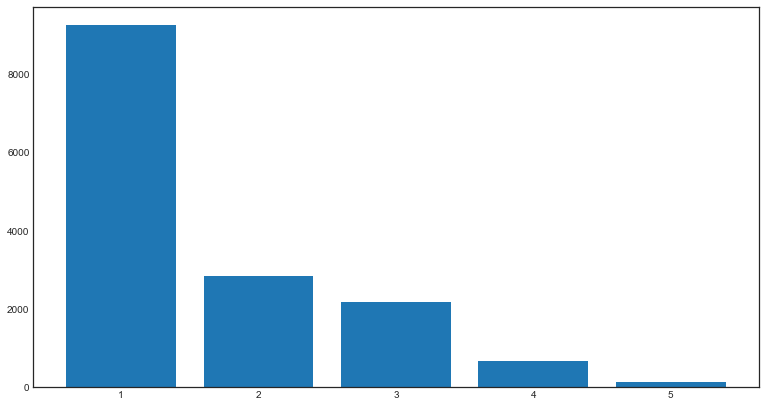

In [88]:
plt.bar([1,2,3,4,5],[9262, 2850, 2177, 678, 141])  # bar chart is outputted to show the difference in values.

In [89]:
sucidedataframe.head()  # dataframe head is outputted.

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,1,0,0,0,0,0,0,0,0,0,...,363000,0,0,0.0,8.841667e+10,3264,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,...,1997000,0,0,0.0,8.841667e+10,3264,0,0,0,2
2,1,0,0,0,0,0,0,0,0,0,...,3346300,0,0,0.0,8.841667e+10,3264,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,2304000,0,0,0.0,8.841667e+10,3264,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,2234200,0,0,0.0,8.841667e+10,3264,0,0,0,0


In [90]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

In [91]:
sucidedataframe['Cellular_subscriptions_per_100_people'] = sucidedataframe['Cellular_subscriptions_per_100_people'].astype(np.int64)  # converting float to int.

In [92]:
sucidedataframe['Suicidesper100k'] = sucidedataframe['Suicidesper100k'].astype(np.int64)  # converting float to int.

In [93]:
sucidedataframe['GDPpyear'] = sucidedataframe['GDPpyear'].astype(np.int64)  # converting float to int.

In [94]:
sucidedataframe['Expense_percent_of_GDP)'] = sucidedataframe['Expense_percent_of_GDP)'].astype(np.int64)  # converting float to int.

In [95]:
sucidedataframe['Physicians_per_1,000_people)'] = sucidedataframe['Physicians_per_1,000_people)'].astype(np.int64)  # converting float to int.

In [96]:
sucidedataframe['Refugee_population_by_country_or_territory_of_origin'] = sucidedataframe['Refugee_population_by_country_or_territory_of_origin'].astype(np.int64)  # converting float to int.

In [97]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Argentina                                             15110 non-null  int32
 1   Armenia                                               15110 non-null  int32
 2   Australia                                             15110 non-null  int32
 3   Austria                                               15110 non-null  int32
 4   Azerbaijan                                            15110 non-null  int32
 5   Belgium                                               15110 non-null  int32
 6   Brazil                                                15110 non-null  int32
 7   Bulgaria                                              15110 non-null  int32
 8   Canada                                                15110 non-null  int32


### selecting X and Y values 

In [98]:
sucidedataframe.head(1)  # the fisrt elements of the data frame are outputted

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Population,Internet_Usage_per_percent_Population,Total_Labour_force,Cellular_subscriptions_per_100_people,GDPpyear,GDPpcapital,Expense_percent_of_GDP),"Physicians_per_1,000_people)",Refugee_population_by_country_or_territory_of_origin,Suicidesper100k
0,1,0,0,0,0,0,0,0,0,0,...,363000,0,0,0,88416668900,3264,0,0,0,3


In [99]:
Features_after_corelation_matrix.head(1)  # the fisrt elements of the data frame are outputted

,Argentina,Armenia,Australia,Austria,Azerbaijan,Belgium,Brazil,Bulgaria,Canada,Chile,...,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Gender,5-14 years,15-24 years,75+ years
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [100]:
X = sucidedataframe.iloc[:, :-1].values  # selecting the values for the X variable.

In [101]:
X2 = Features_after_corelation_matrix.iloc[:, :].values # selecting the 
                                                                                        # values for the X2 variable.

In [102]:
y = sucidedataframe.iloc[:, -1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [103]:
print("X ", X, "\n", "X2 " , X2 , "\n", "y ", y)  # priting arrays

X  [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 
 X2  [[1 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]] 
 y  [3 2 1 ... 0 0 0]


# Principal component analysis

## Using continues variables 

In [104]:
X_pca = sucidedataframe.iloc[:, 55:].values

       principal component 1  principal component 2  Suicidesper100k
0                  -2.194170               0.041904                3
1                  -2.170999               0.215195                2
2                  -2.154446               0.355028                1
3                  -2.193486               0.213807                0
4                  -2.195109               0.205605                0
...                      ...                    ...              ...
15105              -2.183099               0.361970                0
15106              -2.259166              -0.022590                0
15107              -2.203059               0.261061                0
15108              -2.206094               0.245718                0
15109              -2.233818               0.105559                0

[15110 rows x 3 columns]

 [0.33294178 0.22797792]
Total values :   0.5609196964938398 %
missing values : 0.43908030350616023 %


,principal component 1,principal component 2,Suicidesper100k
0,-2.194170,0.041904,3
1,-2.170999,0.215195,2
2,-2.154446,0.355028,1
3,-2.193486,0.213807,0
4,-2.195109,0.205605,0
...,...,...,...
15105,-2.183099,0.361970,0
15106,-2.259166,-0.022590,0
15107,-2.203059,0.261061,0
15108,-2.206094,0.245718,0


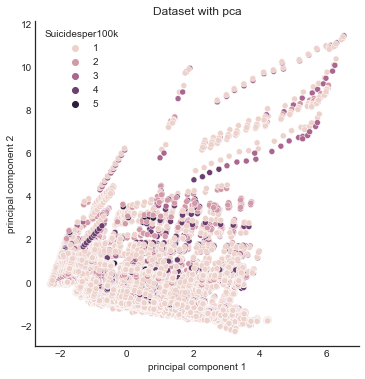

In [105]:
pcafuntion(X_pca,2 ,['principal component 1','principal component 2'], sucidedataframe[["Suicidesper100k"]], "Suicidesper100k", [1,2,3,4,5])

       principal component 1  principal component 2  principal component 3  \
0                  -2.194170               0.041904              -0.492976   
1                  -2.170999               0.215195              -0.390163   
2                  -2.154446               0.355028              -0.293496   
3                  -2.193486               0.213807              -0.248451   
4                  -2.195109               0.205605              -0.249958   
...                      ...                    ...                    ...   
15105              -2.183099               0.361970              -0.194498   
15106              -2.259166              -0.022590              -0.265132   
15107              -2.203059               0.261061              -0.213032   
15108              -2.206094               0.245718              -0.215850   
15109              -2.233818               0.105559              -0.241594   

       Suicidesper100k  
0                    3  
1            

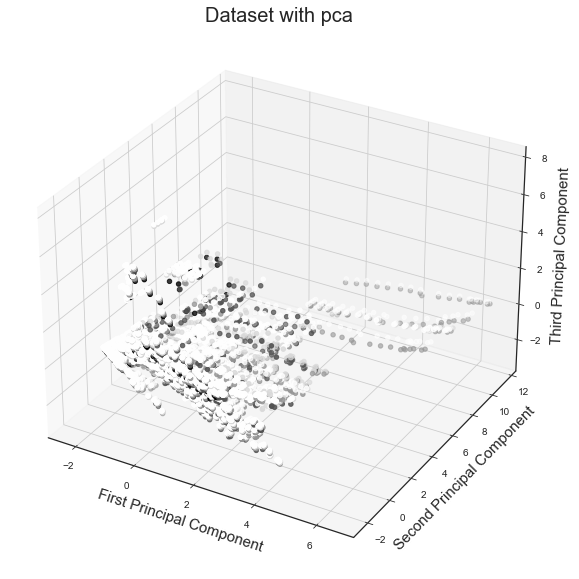

,principal component 1,principal component 2,principal component 3,Suicidesper100k
0,-2.194170,0.041904,-0.492976,3
1,-2.170999,0.215195,-0.390163,2
2,-2.154446,0.355028,-0.293496,1
3,-2.193486,0.213807,-0.248451,0
4,-2.195109,0.205605,-0.249958,0
...,...,...,...,...
15105,-2.183099,0.361970,-0.194498,0
15106,-2.259166,-0.022590,-0.265132,0
15107,-2.203059,0.261061,-0.213032,0
15108,-2.206094,0.245718,-0.215850,0


In [106]:
pcafuntion(X_pca,3 ,['principal component 1','principal component 2', 'principal component 3'], sucidedataframe[["Suicidesper100k"]], "Suicidesper100k", [1,2,3,4,5])

In [107]:
pcom = "principal component "
plist = ['principal component 1','principal component 2', 'principal component 3']
for i in range(4,10):
    plist.append(pcom + str(i))
    print("Number of Components ", i)
    pcafuntion(X_pca,i ,plist, sucidedataframe[["Suicidesper100k"]], "Suicidesper100k", [1,2,3,4,5])
    print("\n\n")

Number of Components  4
       principal component 1  principal component 2  principal component 3  \
0                  -2.194170               0.041904              -0.492976   
1                  -2.170999               0.215195              -0.390163   
2                  -2.154446               0.355028              -0.293496   
3                  -2.193486               0.213807              -0.248451   
4                  -2.195109               0.205605              -0.249958   
...                      ...                    ...                    ...   
15105              -2.183099               0.361970              -0.194498   
15106              -2.259166              -0.022590              -0.265132   
15107              -2.203059               0.261061              -0.213032   
15108              -2.206094               0.245718              -0.215850   
15109              -2.233818               0.105559              -0.241594   

       principal component 4  Suicidesp

       principal component 1  principal component 2  principal component 3  \
0                  -2.194170               0.041904              -0.492976   
1                  -2.170999               0.215195              -0.390163   
2                  -2.154446               0.355028              -0.293496   
3                  -2.193486               0.213807              -0.248451   
4                  -2.195109               0.205605              -0.249958   
...                      ...                    ...                    ...   
15105              -2.183099               0.361970              -0.194498   
15106              -2.259166              -0.022590              -0.265132   
15107              -2.203059               0.261061              -0.213032   
15108              -2.206094               0.245718              -0.215850   
15109              -2.233818               0.105559              -0.241594   

       principal component 4  principal component 5  principal 

## Over-sampling

In [108]:
print('Original dataset shape %s' % Counter(y))  # original data set rows counted

Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})


In [109]:
ros = RandomOverSampler(random_state=42)  # instance of object created.
X_over, y_over = ros.fit_resample(X, y)  # oversampling model fitting
print('Resampled dataset shape %s' % Counter(y_over))  # oversampled data set rows counted

Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})


## Spliting the datasets into a training and test set 

## Original x and y values.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [111]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))

The length of X_train is  12088  and the length of y_train is  12088
The length of X_test is  3022  and the length of y_test is  3022


## Original x and y values after they have been over Sampled.

In [112]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [113]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train_over is ",len(X_train_over), " and the length of y_train_over is ", len(y_train_over))  
print("The length of X_test_over is ",len(X_test_over), " and the length of y_test_over is ", len(y_test_over))

The length of X_train_over is  37056  and the length of y_train_over is  37056
The length of X_test_over is  9264  and the length of y_test_over is  9264


## x2 and y2  values choosend by using the corelation matrix.

In [114]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [115]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X2_train is ",len(X2_train), " and the length of y2_train is ", len(y2_train))
print("The length of X2_test is ",len(X2_test), " and the length of y2_test is ", len(y2_test))

The length of X2_train is  12088  and the length of y2_train is  12088
The length of X2_test is  3022  and the length of y2_test is  3022


In [116]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   Argentina                                             15110 non-null  int32
 1   Armenia                                               15110 non-null  int32
 2   Australia                                             15110 non-null  int32
 3   Austria                                               15110 non-null  int32
 4   Azerbaijan                                            15110 non-null  int32
 5   Belgium                                               15110 non-null  int32
 6   Brazil                                                15110 non-null  int32
 7   Bulgaria                                              15110 non-null  int32
 8   Canada                                                15110 non-null  int32
